In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib widget
import pyobs

In [2]:
N = 5000 # number of configs
mu = 3.14 # central values
cov = (mu*0.02)**2 # error^2

# autocorrelation time
tau = 10.0

rng = pyobs.random.generator('Mattia Bruno')
data = rng.markov_chain(mu,cov,tau,N)

Random generator initialized with seed = 2861754801 [Mattia Bruno]


<img src="https://github.com/mbruno46/pyobs/raw/master/doc/pyobs-logo.png" width="30%">

Let's incorporate all the functionalities studied before in a single library `pyobs`!

Documentation and source code [pyobs](https://github.com/mbruno46/pyobs/tree/master) 

In [3]:
pi = pyobs.observable(description='pi')
pi.create('EnsembleA', data)
print(pi)

3.098(58)



``pyobs`` provides automatic or manual windowing procedure a la Wolff, calculation of integrated autocorrelation times, etc...

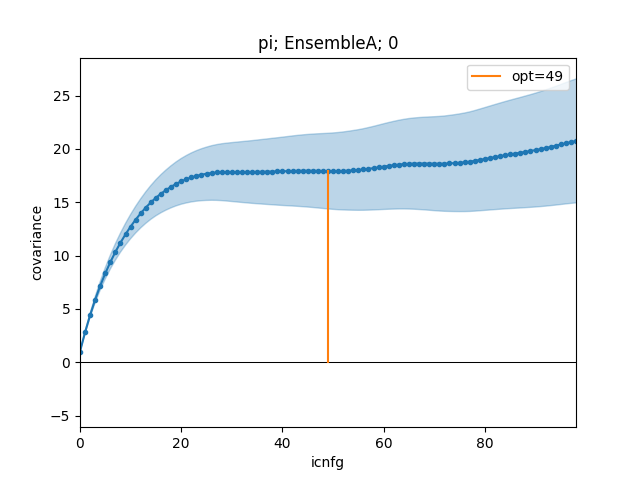

[array([3.09823055]), array([0.05784008])]


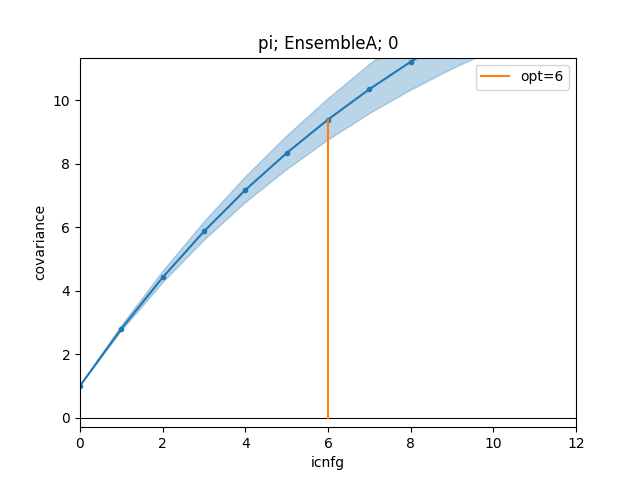

[array([3.09823055]), array([0.04187239])]

In [4]:
print(pi.error(plot=True))
pi.error(plot=True, errinfo = {'EnsembleA': pyobs.errinfo(W=6)})

In [5]:
pi.tauint()

{'EnsembleA': [array([8.96010425]), array([1.77401013])]}

Built-in support for arbitrary tensor structures

In [6]:
T=16
L=16
mass=0.25
p=0.0

xax=range(T//2)
corr_ex = [pyobs.qft.free_scalar.Cphiphi(x,mass,p,T,L) for x in xax]
cov_ex = pyobs.qft.free_scalar.cov_Cphiphi(mass,p,T,L)[0:T//2,0:T//2]

N=4000
tau=1.0
data = rng.markov_chain(corr_ex,cov_ex,tau,N)
print(f'Input data shape = {data.shape} \n')

corr = pyobs.observable()
corr.create(f'test', data.flatten(), shape=(len(xax),))

corr.peek()

Input data shape = (4000, 8) 

Observable with shape = (8,)
 - description: unknown
 - created by mbruno at macthxbruno.local on Tue Oct 10 18:17:16 2023
 - size: 612 KB
 - mean: [ 0.16505452 -0.24106124 -0.71903323 -1.24010888 -1.67052123 -1.83465963
 -1.89860419 -1.90040937]
 - Ensemble test
    - Replica 0 with ncnfg 4000
         temporary additional memory required 0.061 MB



In [7]:
# nice print format
corr

0.2(1.6)	-0.2(1.5)	-0.7(1.4)	-1.2(1.4)	-1.7(1.4)	-1.8(1.4)	-1.9(1.4)	-1.9(1.4)

In [8]:
print('slicing : ', corr[0:4])

# reshape
mat = pyobs.reshape(corr[0:6], (3,2))
mat

slicing :  0.2(1.6)	-0.2(1.5)	-0.7(1.4)	-1.2(1.4)



0.2(1.6)	-0.2(1.5)
-0.7(1.4)	-1.2(1.4)
-1.7(1.4)	-1.8(1.4)

In [9]:
pyobs.transpose(mat)

0.2(1.6)	-0.7(1.4)	-1.7(1.4)
-0.2(1.5)	-1.2(1.4)	-1.8(1.4)

Basic I/O functionalities, several file formats supported, defaults to `.pyobs` native binary checksummed format!

In [10]:
pyobs.save('temp.pyobs', {
    'metadata': 'a long description goes here', 
    't/a': np.arange(0,96),
    'pi': pi
})

[Bison] : Written 0.0409927 MB at 46.7344 MB/s


In [11]:
pyobs.load('temp.pyobs')

[Bison] : Reading file temp.pyobs
[Bison] : File created by mbruno at macthxbruno.local on Tue Oct 10 18:17:17 2023
[Bison] : Read 0.0409927 MB at 7.38588 MB/s


{'metadata': 'a long description goes here',
 't/a': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 'pi': 3.098(58)}

In [12]:
!rm temp.pyobs

Automatic error propagation on derived quantities (see Lecture 2)

In [13]:
pi**2, pyobs.log(pi)

(9.60(36), 1.131(19))

In [14]:
print(mat @ pyobs.transpose(mat))
print(mat * mat)

0.09(22)	0.2(3.1)	0.2(5.5)
0.2(3.1)	2.1(5.5)	3.5(7.5)
0.2(5.5)	3.5(7.5)	6.2(9.6)

0.03(52)	0.06(73)
0.5(2.1)	1.5(3.5)
2.8(4.6)	3.4(5.1)



In [15]:
pyobs.sum(mat, axis=0)

-2.2(4.3)	-3.3(4.2)

Linear algebra routines

In [16]:
mat2 = mat @ pyobs.transpose(mat) + np.eye(3)
w, v = pyobs.linalg.eig(mat2)
w

9(15)	1.15(22)	1.00000000000000022(47)

In [17]:
pyobs.linalg.inv(mat2)

0.931(83)	-0.07(24)	0.01(54)
-0.07(24)	0.74(19)	-0.36(18)
0.01(54)	-0.36(18)	0.31(13)

Master-field support

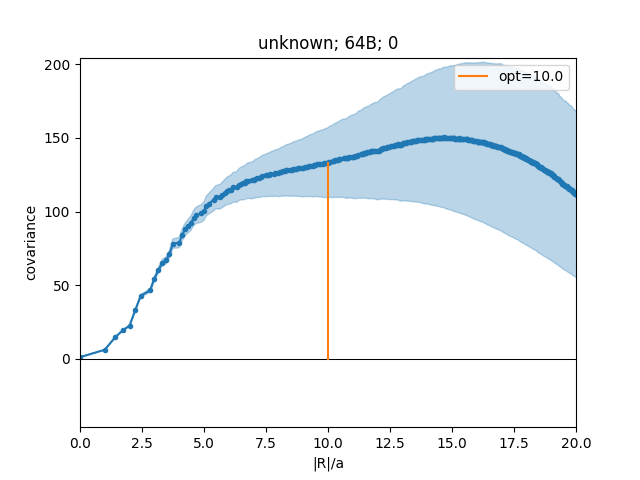

[array([0.03732371]), array([0.0001326])]

In [18]:
data = np.load('t2Et_64x64x64.npy')
lat = [64,64,64]

t2Et = pyobs.observable()
t2Et.create('64B', data.flatten(), lat=lat)
t2Et.error(plot=True, errinfo={'64B': pyobs.errinfo(W=10)})

and much more ... 